In [ ]:
import cv2
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from skimage.transform import resize

count = 0
videoFile = "/content/drive/MyDrive/인공지능/11week/Tom and Jerry.mp4"
cap= cv2.VideoCapture(videoFile)
frameRate = cap.get(5)
x = 1
while(cap.isOpened()):
  frameId = cap.get(1)
  ret, frame = cap.read()
  if (ret != True):
    break
  if (frameId % math.floor(frameRate) == 0):
    filename = "frame%d.jpg" % count
    count += 1
    cv2.imwrite(filename, frame)
cap.release()
print("Done!")


Done!


In [ ]:
count = 0
videoFile = "/content/drive/MyDrive/인공지능/11week/Tom and Jerry 3.mp4"
cap= cv2.VideoCapture(videoFile)
frameRate = cap.get(5)
x = 1
while(cap.isOpened()):
  frameId = cap.get(1)
  ret, frame = cap.read()
  if (ret != True):
    break
  if (frameId % math.floor(frameRate) == 0):
    filename = "test%d.jpg" % count
    count += 1
    cv2.imwrite(filename, frame)
cap.release()
print("Done!")

Done!


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/인공지능/11week/mapping.csv')
test = pd.read_csv('/content/drive/MyDrive/인공지능/11week/testing.csv')

X = []
for img_name in data.Image_ID:
  img = plt.imread('/content/' + img_name)
  X.append(img)
X = np.array(X)

test_image = []
for img_name in test.Image_ID:
  img = plt.imread('/content/' + img_name)
  test_image.append(img)
test_img = np.array(test_image)

from keras.utils import to_categorical
train_y = to_categorical(data.Class)
test_y = to_categorical(test.Class)

image = []
for i in range(0, X.shape[0]):
  a = resize(X[i], preserve_range=True, output_shape=(224, 224, 3)).astype(int)
  image.append(a)
X = np.array(image)

test_image = []
for i in range(0, test_img.shape[0]):
  a = resize(test_img[i], preserve_range=True, output_shape=(224,224)).astype(int)
  test_image.append(a)
test_image = np.array(test_image)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, train_y, test_size=0.3, random_state=42)

from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout, Flatten

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


print("Done!!")

58889256/58889256 [==============================] - 0s 0us/step
Done!!


In [ ]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(units = 1024, activation = 'sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(units = 512, activation = 'sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(units = 256, activation = 'sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(3, activation = 'softmax'))

from keras.callbacks import ModelCheckpoint, EarlyStopping
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'min')
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs = 100, validation_data = (X_valid, y_valid), callbacks = [checkpoint, early_stopping_callback])
print("Done2")

Epoch 1/100
7/7 [==============================] - ETA: 0s - loss: 1.3525 - accuracy: 0.3606
Epoch 1: val_loss improved from inf to 1.08231, saving model to weights.best.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7/7 [==============================] - 56s 5s/step - loss: 1.3525 - accuracy: 0.3606 - val_loss: 1.0823 - val_accuracy: 0.3889
Epoch 2/100
7/7 [==============================] - ETA: 0s - loss: 1.2287 - accuracy: 0.3846
Epoch 2: val_loss did not improve from 1.08231
7/7 [==============================] - 3s 450ms/step - loss: 1.2287 - accuracy: 0.3846 - val_loss: 1.1084 - val_accuracy: 0.3667
Epoch 3/100
7/7 [==============================] - ETA: 0s - loss: 1.2538 - accuracy: 0.3365
Epoch 3: val_loss did not improve from 1.08231
7/7 [==============================] - 3s 409ms/step - loss: 1.2538 - accuracy: 0.3365 - val_loss: 1.0848 - val_accuracy: 0.3889
Epoch 4/100
7/7 [==============================] - ETA: 0s - loss: 1.1819 - accuracy: 0.4423
Epoch 4: val_loss did not improve from 1.08231
7/7 [==============================] - 3s 422ms/step - loss: 1.1819 - accuracy: 0.4423 - val_loss: 1.0963 - val_accuracy: 0.3889
Epoch 5/100
7/7 [==============================] - ETA: 0s - loss:

6/6 [==============================] - 1s 126ms/step - loss: 1.0040 - accuracy: 0.5484
Real Test accuracy: 54.84%
6/6 [==============================] - 1s 131ms/step
The screen time of None is  0 seconds
The screen time of Jerry is  8 seconds
The screen time of Tom is  178 seconds


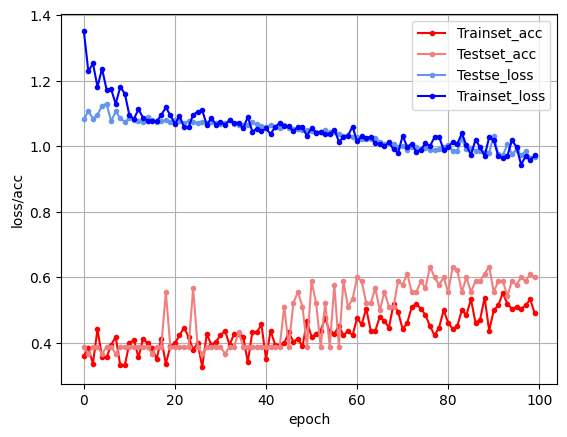

In [ ]:
scores = model.evaluate(test_image, test_y)
print("Real Test %s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))

predictions = np.argmax(model.predict(test_image), axis = 1)
print("The screen time of None is ", predictions[predictions == 0].shape[0], "seconds")
print("The screen time of Jerry is ", predictions[predictions == 1].shape[0], "seconds")
print("The screen time of Tom is ", predictions[predictions == 2].shape[0], "seconds")

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, acc, marker = '.', c = 'red', label = 'Trainset_acc')
plt.plot(x_len, val_acc, marker = '.', c = 'lightcoral', label = 'Testset_acc')
plt.plot(x_len, y_vloss, marker = '.', c = 'cornflowerblue', label = 'Testse_loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'Trainset_loss')

plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()